In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/'Colab Notebooks'
%cd Data/

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks
/content/drive/MyDrive/Colab Notebooks/Data


In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
listing = pd.read_csv('listings.csv')
reviews = pd.read_csv('reviews.csv')
calendar = pd.read_csv('calendar.csv')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
listing.dropna()
reviews.dropna()
calendar.dropna()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights


In [ ]:
listing


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,155305,https://www.airbnb.com/rooms/155305,20240621025915,2024-06-21,city scrape,Cottage! BonPaul + Sharky's Hostel,NaN,"We are within easy walk of pubs, breweries, mu...",https://a0.muscache.com/pictures/8880711/cf38d...,746673,...,4.75,4.92,4.58,NaN,f,8,2,2,4,2.78
1,156805,https://www.airbnb.com/rooms/156805,20240621025915,2024-06-21,city scrape,"Private Room ""Ader"" at BPS Hostel",NaN,"Easy walk to pubs, cafes, bakery, breweries, l...",https://a0.muscache.com/pictures/23447d55-fa7e...,746673,...,4.61,4.84,4.46,NaN,t,8,2,2,4,0.43
2,156926,https://www.airbnb.com/rooms/156926,20240621025915,2024-06-21,city scrape,"Mixed Dorm ""Top Bunk #1"" at BPS Hostel",This is a top bunk in the mixed dorm room<br /...,NaN,https://a0.muscache.com/pictures/5fa7178e-c514...,746673,...,4.77,4.78,4.78,NaN,t,8,2,2,4,2.17
3,197263,https://www.airbnb.com/rooms/197263,20240621025915,2024-06-21,city scrape,Tranquil Room & Private Bath,"This is a comfy, peaceful and clean room with ...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,961396,...,4.93,4.85,4.98,NaN,f,2,1,1,0,0.57
4,209068,https://www.airbnb.com/rooms/209068,20240621025915,2024-06-21,city scrape,Terrace Cottage,NaN,Our beautiful Grove Park Historic District clo...,https://a0.muscache.com/pictures/1829924/9f3bf...,1029919,...,4.98,4.94,4.79,NaN,f,1,1,0,0,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3026,1181866822798135436,https://www.airbnb.com/rooms/1181866822798135436,20240621025915,2024-06-21,city scrape,Pet-Friendly Studio Apartment,Located only a mile and a half from the heart ...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,65522713,...,NaN,NaN,NaN,NaN,t,2,1,1,0,NaN
3027,1182610209149741594,https://www.airbnb.com/rooms/1182610209149741594,20240621025915,2024-06-21,city scrape,The Wild Queendom,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,443280189,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
3028,1182611615301483702,https://www.airbnb.com/rooms/1182611615301483702,20240621025915,2024-06-21,city scrape,Welcome to Carol's Castle!,Welcome to Carol's Castle. Mountain views & ho...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,490458593,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
3029,1182681060839809586,https://www.airbnb.com/rooms/1182681060839809586,20240621025915,2024-06-21,city scrape,"Modern Home Near Biltmore with Game Room, Hot Tub",High Meadow Manor - a farmhouse style 3 story ...,House Rules (All Guests agree to Abide by our ...,https://a0.muscache.com/pictures/prohost-api/H...,34054479,...,NaN,NaN,NaN,NaN,t,2,2,0,0,NaN


In [ ]:
reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,155305,409437,2011-07-31,844309,Jillian,We had a wonderful time! The cottage was very ...
1,155305,469775,2011-08-23,343443,Katie,Place was great! Can't really speak to the ins...
2,155305,548257,2011-09-19,1152025,Katie,We had a great time! The cabin was nice and a...
3,155305,671470,2011-10-28,1245885,Jason,Clean and comfortable room with everything you...
4,155305,1606327,2012-07-01,1891395,Craig,The cabin was solid for an overnight stay. It ...
...,...,...,...,...,...,...
331713,1042880340309253114,1170321514127198950,2024-06-02,70071605,Adam,Excellent rental for a trip with a group of fr...
331714,1042880340309253114,1183415924717512366,2024-06-20,190293229,Lydia,We absolutely love our stay. The bedrooms were...
331715,1044275403674027682,1111599924823396576,2024-03-13,212143528,Anna,it was an embassy suite. new. free breakfast.
331716,1044275403674027682,1139900189378161069,2024-04-21,174189864,Rayli,We loved this stay! Very nice hotel and close ...


In [ ]:
calendar

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,8521,2024-06-29,f,$225.00,NaN,2,1125
1,8521,2024-06-30,f,$225.00,NaN,2,1125
2,8521,2024-07-01,f,$225.00,NaN,2,1125
3,8521,2024-07-02,f,$225.00,NaN,2,1125
4,8521,2024-07-03,f,$225.00,NaN,2,1125
...,...,...,...,...,...,...,...
443021,4753390,2025-06-24,f,$245.00,NaN,45,255
443022,4753390,2025-06-25,f,$245.00,NaN,45,255
443023,4753390,2025-06-26,f,$245.00,NaN,45,255
443024,4753390,2025-06-27,f,$245.00,NaN,45,255


In [ ]:
print(listing.shape)
print(listing.columns)
print(listing.info)


(3031, 75)
Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_av

In [ ]:
print(calendar.shape)
print(calendar.columns)
print(calendar.info)

(443026, 7)
Index(['listing_id', 'date', 'available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights'],
      dtype='object')
<bound method DataFrame.info of         listing_id        date available    price  adjusted_price  \
0             8521  2024-06-29         f  $225.00             NaN   
1             8521  2024-06-30         f  $225.00             NaN   
2             8521  2024-07-01         f  $225.00             NaN   
3             8521  2024-07-02         f  $225.00             NaN   
4             8521  2024-07-03         f  $225.00             NaN   
...            ...         ...       ...      ...             ...   
443021     4753390  2025-06-24         f  $245.00             NaN   
443022     4753390  2025-06-25         f  $245.00             NaN   
443023     4753390  2025-06-26         f  $245.00             NaN   
443024     4753390  2025-06-27         f  $245.00             NaN   
443025     4753390  2025-06-28         f  $245.00             

In [ ]:
print(reviews.shape)
print(reviews.columns)
print(reviews.info)

(331718, 6)
Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')
<bound method DataFrame.info of                  listing_id                   id        date  reviewer_id  \
0                    155305               409437  2011-07-31       844309   
1                    155305               469775  2011-08-23       343443   
2                    155305               548257  2011-09-19      1152025   
3                    155305               671470  2011-10-28      1245885   
4                    155305              1606327  2012-07-01      1891395   
...                     ...                  ...         ...          ...   
331713  1042880340309253114  1170321514127198950  2024-06-02     70071605   
331714  1042880340309253114  1183415924717512366  2024-06-20    190293229   
331715  1044275403674027682  1111599924823396576  2024-03-13    212143528   
331716  1044275403674027682  1139900189378161069  2024-04-21    174189864   
331717  10442

In [ ]:
num_active_listings = listing['id'].nunique()

print(f"Number of unique active listings: {num_active_listings}")

Number of unique active listings: 3031


0    $225.00
1    $225.00
2    $225.00
3    $225.00
4    $225.00
Name: price, dtype: object
0
['$225.00' '$70.00' '$80.00' '$179.00' '$319.00' '$185.00' '$118.00'
 '$349.00' '$50.00' '$479.00' '$470.00' '$326.00' '$200.00' '$85.00'
 '$300.00' '$265.00' '$250.00' '$69.00' '$197.00' '$375.00' '$170.00'
 '$133.00' '$865.00' '$45.00' '$395.00' '$135.00' '$100.00' '$249.00'
 '$75.00' '$104.00' '$110.00' '$700.00' '$65.00' '$150.00' '$60.00'
 '$129.00' '$155.00' '$295.00' '$189.00' '$109.00' '$115.00' '$340.00'
 '$299.00' '$98.00' '$90.00' '$499.00' '$105.00' '$108.00' '$149.00'
 '$120.00' '$154.00' '$259.00' '$475.00' '$210.00' '$190.00' '$342.00'
 '$500.00' '$350.00' '$99.00' '$145.00' '$399.00' '$146.00' '$240.00'
 '$235.00' '$619.00' '$89.00' '$72.00' '$66.00' '$68.00' '$151.00'
 '$95.00' '$180.00' '$1,200.00' '$220.00' '$275.00' '$175.00' '$258.00'
 '$321.00' '$495.00' '$213.00' '$117.00' '$125.00' '$55.00' '$130.00'
 '$158.00' '$255.00' '$298.00' '$223.00' '$88.00' '$425.00' '$219.00'


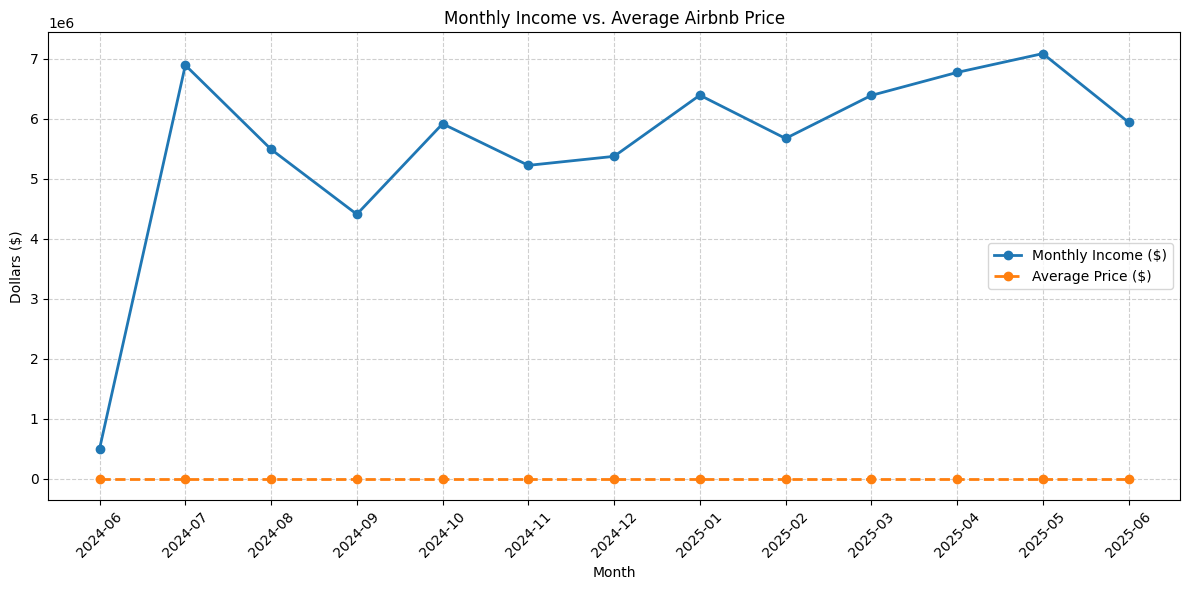

In [ ]:
# Monthly Income to Average Airbnb Price Comparison
calendar_data = pd.read_csv('calendar.csv')
print(calendar_data['price'].head())
print(calendar_data['price'].isnull().sum())
print(calendar_data['price'].unique())

# Data Cleaning
calendar_data['price'] = calendar_data['price'].replace('[\$,]', '', regex=True)
calendar_data['price'] = pd.to_numeric(calendar_data['price'], errors='coerce')
print(calendar_data['price'].dtypes)
print(calendar_data['price'].describe())
calendar_data = calendar_data.dropna(subset=['price'])

# analysis
calendar_data['date'] = pd.to_datetime(calendar_data['date'])
calendar_data['month'] = calendar_data['date'].dt.to_period('M')
calendar_data['income'] = calendar_data.apply(
    lambda row: row['price'] if row['available'] == 'f' else 0, axis=1
)
monthly_income = calendar_data.groupby('month')['income'].sum()
average_monthly_price = calendar_data.groupby('month')['price'].mean()
comparison_df = pd.DataFrame({
    'Monthly Income': monthly_income,
    'Average Price': average_monthly_price
})

# Plot
plt.figure(figsize=(12, 6))
plt.plot(comparison_df.index.astype(str), comparison_df['Monthly Income'], marker='o', label='Monthly Income ($)', linewidth=2)
plt.plot(comparison_df.index.astype(str), comparison_df['Average Price'], marker='o', label='Average Price ($)', linewidth=2, linestyle='--')
plt.title('Monthly Income vs. Average Airbnb Price')
plt.xlabel('Month')
plt.ylabel('Dollars ($)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()




Total Active Listings (Last 12 Months): 1214

Monthly Active Listings:
month
2024-06    1214
2024-07    1214
2024-08    1214
2024-09    1214
2024-10    1214
2024-11    1214
2024-12    1214
2025-01    1214
2025-02    1214
2025-03    1214
2025-04    1214
2025-05    1214
2025-06    1211
Freq: M, Name: listing_id, dtype: int64

Monthly Occupancy Rates:
month
2024-06    0.841021
2024-07    0.771643
2024-08    0.549849
2024-09    0.505821
2024-10    0.513738
2024-11    0.457304
2024-12    0.423872
2025-01    0.504039
2025-02    0.485644
2025-03    0.484588
2025-04    0.578364
2025-05    0.584711
2025-06    0.534830
Freq: M, Name: occupied_flag, dtype: float64

Monthly Review Counts:
month
2011-07       1
2011-08       1
2011-09       4
2011-10       3
2011-11       1
           ... 
2024-02    3505
2024-03    5583
2024-04    5642
2024-05    6507
2024-06    2936
Freq: M, Name: listing_id, Length: 156, dtype: int64

Average Monthly Reviews per Listing:
month
2011-07   NaN
2011-08   NaN
2011-09

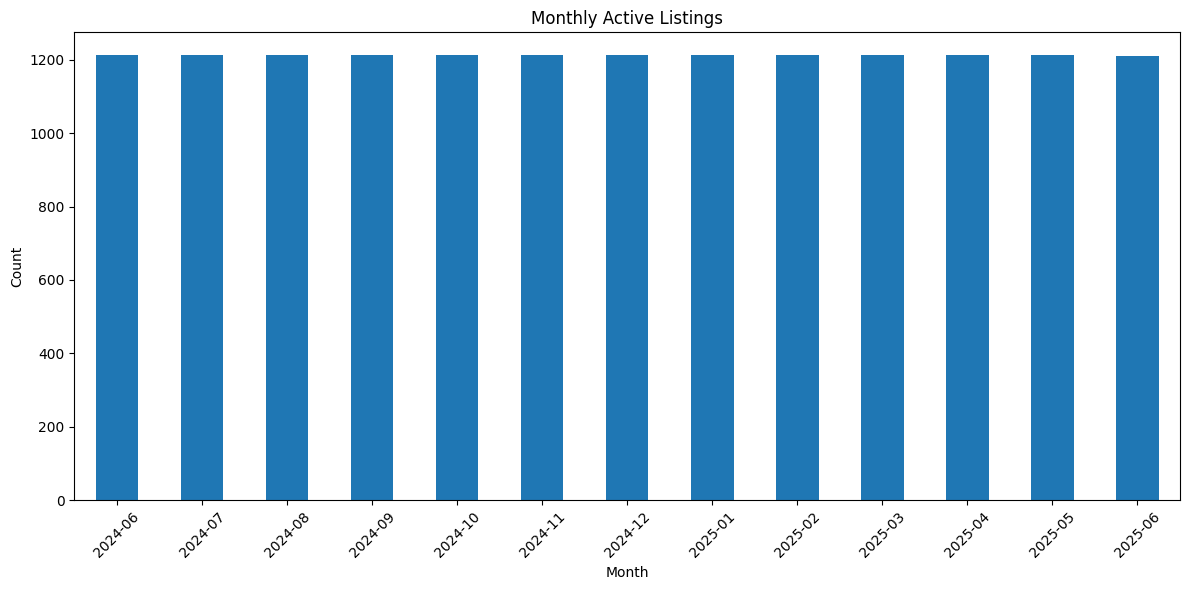

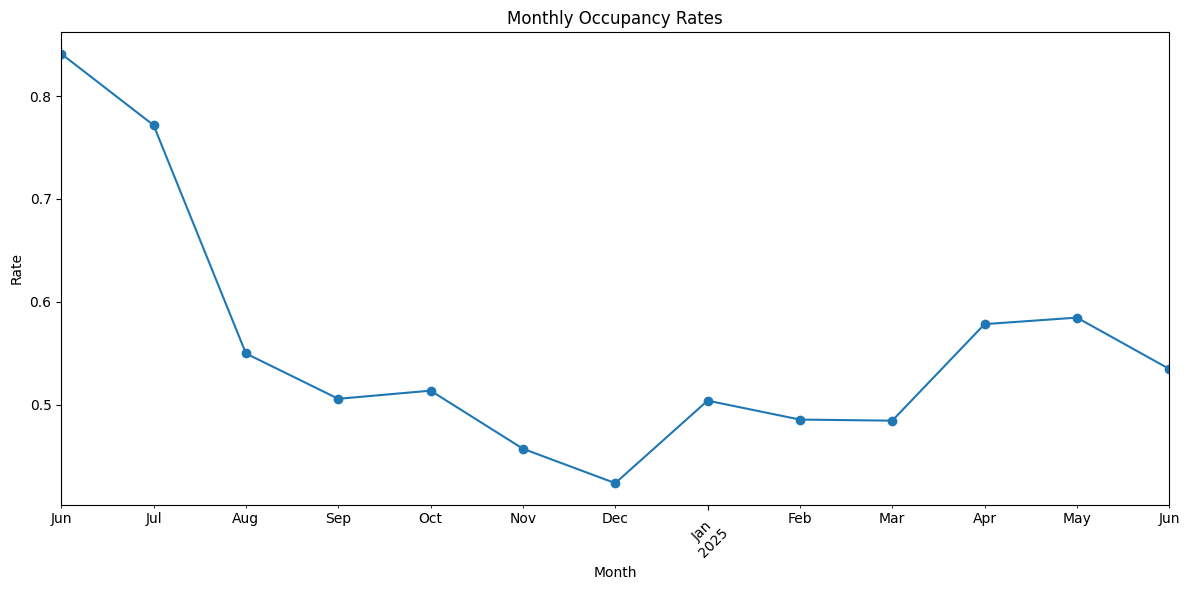

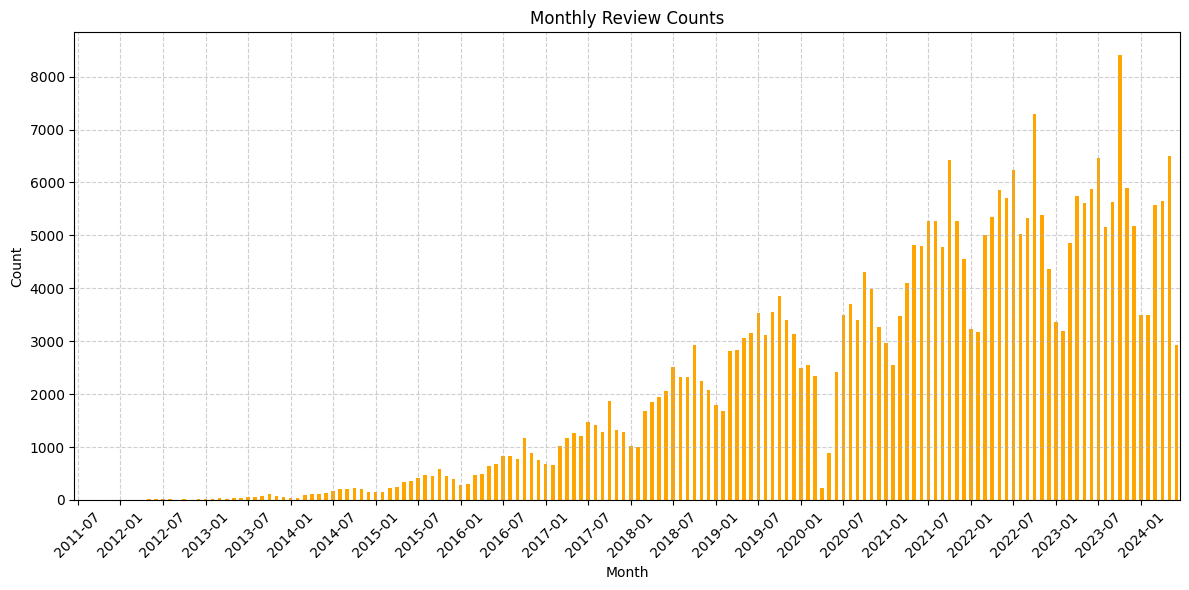

In [ ]:
# Market Supply/Demand Analysis
# Active listings in the past 12 months
active_listings = calendar['listing_id'].nunique()
calendar['date'] = pd.to_datetime(calendar['date'])
calendar['month'] = calendar['date'].dt.to_period('M')
monthly_active_listings = calendar.groupby('month')['listing_id'].nunique()


calendar['occupied_flag'] = calendar['available'].apply(lambda x: 1 if x == 'f' else 0)
monthly_occupancy = calendar.groupby('month')['occupied_flag'].mean()

# Review counts
reviews['date'] = pd.to_datetime(reviews['date'])
reviews['month'] = reviews['date'].dt.to_period('M')
monthly_reviews = reviews.groupby('month')['listing_id'].count()
avg_reviews_per_listing = monthly_reviews / monthly_active_listings

# Output
print("Total Active Listings (Last 12 Months):", active_listings)
print("\nMonthly Active Listings:")
print(monthly_active_listings)

print("\nMonthly Occupancy Rates:")
print(monthly_occupancy)

print("\nMonthly Review Counts:")
print(monthly_reviews)

print("\nAverage Monthly Reviews per Listing:")
print(avg_reviews_per_listing)



# Plot Active Listings
plt.figure(figsize=(12, 6))
monthly_active_listings.plot(kind='bar', title='Monthly Active Listings', ylabel='Count', xlabel='Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Occupancy Rates
plt.figure(figsize=(12, 6))
monthly_occupancy.plot(kind='line', title='Monthly Occupancy Rates', ylabel='Rate', xlabel='Month', marker='o')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Monthly Review Counts
plt.figure(figsize=(12, 6))
ax = monthly_reviews.plot(kind='bar', title='Monthly Review Counts', ylabel='Count', xlabel='Month', color='orange')
xticks = range(0, len(monthly_reviews), 6)  # Display every 6th month
ax.set_xticks(xticks)
ax.set_xticklabels([str(monthly_reviews.index[i]) for i in xticks], rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()





In [ ]:
# Convert 'date' in calendar_df to datetime
calendar['date'] = pd.to_datetime(calendar['date'])

# Filter data for the past 12 months from the last date in the dataset
end_date = calendar['date'].max()
start_date = end_date - pd.DateOffset(months=12)
calendar_past_12_months = calendar[(calendar['date'] >= start_date) & (calendar['date'] <= end_date)]

# Calculate occupancy rate per listing
# Assuming 'f' in 'available' column means the listing was occupied
occupancy_rates = calendar_past_12_months.groupby('listing_id')['available'].apply(
    lambda x: (x == 'f').mean()
).reset_index().rename(columns={'available': 'occupancy_rate'})

print(occupancy_rates.head())


   listing_id  occupancy_rate
0        8521        0.821918
1       11169        0.041096
2       19581        0.290411
3       27498        0.224658
4       79762        0.276712


In [ ]:
# Convert 'date' in reviews_df to datetime
reviews['date'] = pd.to_datetime(reviews['date'])
start_date = pd.to_datetime('10/29/2023')
end_date = pd.to_datetime('10/29/2024')
# Filter reviews from the past 12 months
reviews_past_12_months = reviews[(reviews['date'] >= start_date) & (reviews['date'] <= end_date)]

# Calculate average monthly reviews per listing
monthly_reviews = reviews_past_12_months.groupby(['listing_id', pd.Grouper(key='date', freq='M')]).size()
avg_monthly_reviews = monthly_reviews.groupby('listing_id').mean().reset_index().rename(columns={0: 'avg_monthly_reviews'})

print(avg_monthly_reviews.head())


   listing_id  avg_monthly_reviews
0      155305             4.250000
1      156926             1.333333
2      197263             1.250000
3      209068             1.000000
4      259576             3.625000


<ipython-input-16-b3186f1e9276>:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_reviews = reviews_past_12_months.groupby(['listing_id', pd.Grouper(key='date', freq='M')]).size()


In [ ]:
calendar_past_12_months['price'] = calendar_past_12_months['price'].replace('[\$,]', '', regex=True).astype(float)
monthly_trends = calendar_past_12_months.groupby(pd.Grouper(key='date', freq='M')).agg({
    'available': lambda x: (x == 'f').mean(),  # monthly occupancy rate
    'price': 'mean'
}).rename(columns={'available': 'monthly_occupancy_rate', 'price': 'monthly_avg_price'}).reset_index()

print(monthly_trends)


<ipython-input-17-4bc02ec13336>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_trends = calendar_past_12_months.groupby(pd.Grouper(key='date', freq='M')).agg({


         date  monthly_occupancy_rate  monthly_avg_price
0  2024-06-30                0.841021         277.146623
1  2024-07-31                0.771643         277.146623
2  2024-08-31                0.549849         277.146623
3  2024-09-30                0.505821         277.146623
4  2024-10-31                0.513738         277.146623
5  2024-11-30                0.457304         277.146623
6  2024-12-31                0.423872         277.146623
7  2025-01-31                0.504039         277.146623
8  2025-02-28                0.485644         277.146623
9  2025-03-31                0.484588         277.146623
10 2025-04-30                0.578364         277.146623
11 2025-05-31                0.584711         277.146623
12 2025-06-30                0.534830         276.594550


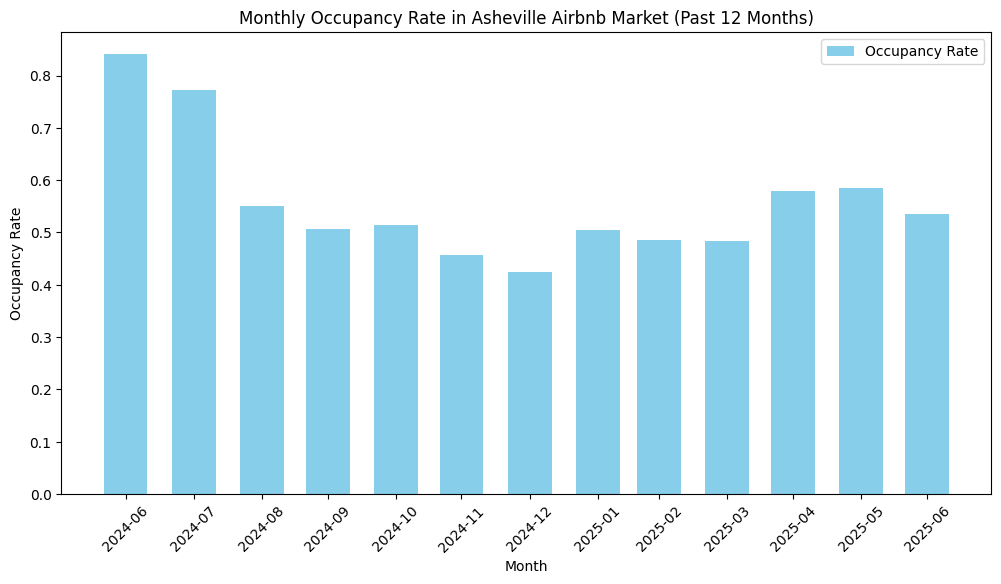

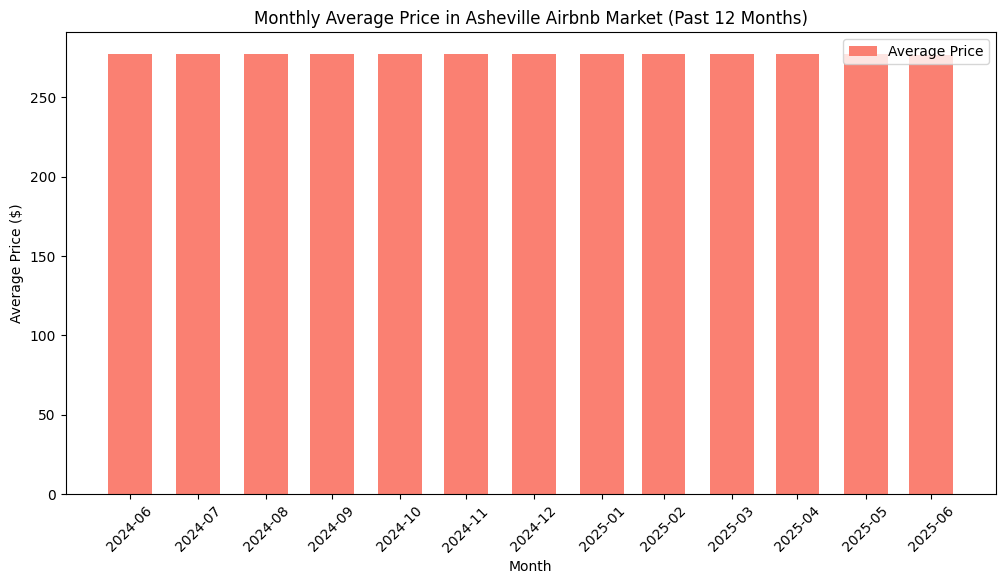

In [ ]:
# Monthly Occupancy Rates
bar_width = 20
start_date = pd.to_datetime('10/29/2023')
end_date = pd.to_datetime('10/29/2024')
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(monthly_trends['date'], monthly_trends['monthly_occupancy_rate'], color='skyblue', width=bar_width, label='Occupancy Rate')
ax1.set_xlabel('Month')
ax1.set_ylabel('Occupancy Rate')
ax1.set_title('Monthly Occupancy Rate in Asheville Airbnb Market (Past 12 Months)')
ax1.set_xticks(monthly_trends['date'])
ax1.set_xticklabels(monthly_trends['date'].dt.strftime('%Y-%m'), rotation=45)

plt.legend()
plt.show()

# Plot
fig, ax2 = plt.subplots(figsize=(12, 6))
ax2.bar(monthly_trends['date'], monthly_trends['monthly_avg_price'], color='salmon', width=bar_width, label='Average Price')
ax2.set_xlabel('Month')
ax2.set_ylabel('Average Price ($)')
ax2.set_title('Monthly Average Price in Asheville Airbnb Market (Past 12 Months)')
ax2.set_xticks(monthly_trends['date'])
ax2.set_xticklabels(monthly_trends['date'].dt.strftime('%Y-%m'), rotation=45)

plt.legend()
plt.show()


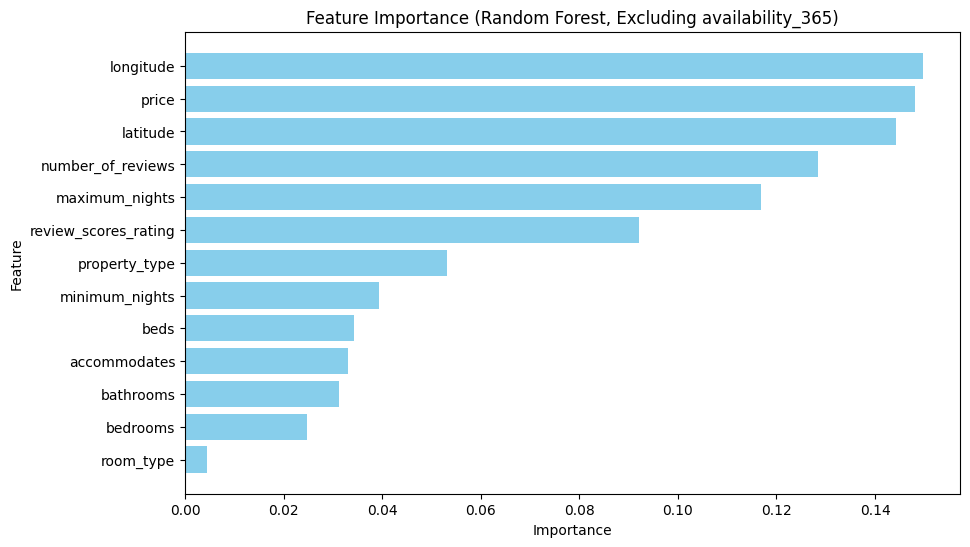

Mean Squared Error: 0.06859933863492068

Feature Importances:
                 Feature  Importance
1              longitude    0.149757
8                  price    0.148154
0               latitude    0.144184
11     number_of_reviews    0.128449
10        maximum_nights    0.116846
12  review_scores_rating    0.092027
2          property_type    0.053244
9         minimum_nights    0.039384
7                   beds    0.034277
4           accommodates    0.033077
5              bathrooms    0.031229
6               bedrooms    0.024814
3              room_type    0.004558


In [ ]:
# Feature Importance
# dataset
file_path = 'listings.csv'
listings_data = pd.read_csv(file_path)

listings_data['occupancy_rate'] = listings_data['availability_365'] / 365.0
columns_to_keep = [
    'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
    'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights',
    'availability_365', 'number_of_reviews', 'review_scores_rating', 'occupancy_rate'
]

data = listings_data[columns_to_keep].copy()
data['price'] = data['price'].replace('[\$,]', '', regex=True).astype(float)
data.fillna({
    'bathrooms': data['bathrooms'].median(),
    'bedrooms': data['bedrooms'].median(),
    'beds': data['beds'].median(),
    'review_scores_rating': data['review_scores_rating'].median(),
    'occupancy_rate': 0
}, inplace=True)
data.dropna(inplace=True)
le_property_type = LabelEncoder()
data['property_type'] = le_property_type.fit_transform(data['property_type'])

le_room_type = LabelEncoder()
data['room_type'] = le_room_type.fit_transform(data['room_type'])
X = data.drop(['occupancy_rate', 'availability_365'], axis=1)
y = data['occupancy_rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_no_availability = RandomForestRegressor(random_state=42)
rf_no_availability.fit(X_train, y_train)

# Evaluate the model
y_pred_rf_no_availability = rf_no_availability.predict(X_test)
mse_rf_no_availability = mean_squared_error(y_test, y_pred_rf_no_availability)

# Feature Importances
feature_importances_rf_no_availability = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_no_availability.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Visualization
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_rf_no_availability['Feature'],
         feature_importances_rf_no_availability['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Random Forest, Excluding availability_365)')
plt.gca().invert_yaxis()
plt.show()

# Output
print(f"Mean Squared Error: {mse_rf_no_availability}")
print("\nFeature Importances:")
print(feature_importances_rf_no_availability)


In [ ]:
#Text Mining and Sentiment Analysis of Customer Reviews
# import necessary libraries
import nltk
from nltk.corpus import stopwords

# Convert comments column to data type String
reviews['comments'] = reviews['comments'].astype(str)

# Create a function dim() to output number of terms/features in a DFM/DTM
# set() is an unordered collection of unique items
def tokenize1():
    tokens = len(set(reviews["comments"].str.split().explode().values))
    print(f'{tokens} dimensions in the DFM.')

# removing punctuations
reviews["comments"] = reviews["comments"].str.replace(r'[^\w\s]+', '')

# convert all words in the "comments" column to lowercase
reviews["comments"] = reviews["comments"].str.lower()

# remove stop_words from the comments column
nltk.download("stopwords")

stop = stopwords.words("english")

reviews["comments"] = reviews["comments"].apply(lambda x: " ".join(x for x in x.split()
                                                         if x not in stop))

tokenize1()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


147698 dimensions in the DFM.


In [ ]:
# stemming
from nltk.stem import PorterStemmer
st = PorterStemmer()
reviews["comments"] = reviews["comments"].apply(lambda x: " ".join([st.stem(word)
                                                         for word in x.split()]))

tokenize1()

136042 dimensions in the DFM.


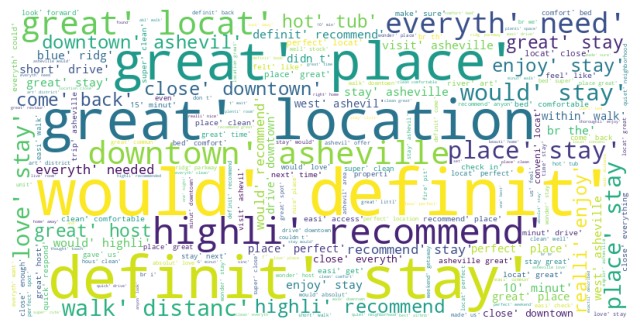

In [ ]:
# !pip install WordCloud

from wordcloud import WordCloud

review_words1 = str(' '.join(reviews["comments"]).split())

# word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(review_words1)

plt.figure(figsize=(8,8))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
# Sentiment Analysis of reviews
# Import libraries
from textblob import TextBlob
import seaborn as sns

# Function to classify sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis
reviews['sentiment'] = reviews['comments'].apply(get_sentiment)
reviews['polarity'] = reviews['comments'].apply(lambda x: TextBlob(x).polarity)

# Plot sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=reviews, x='sentiment')
plt.title("Sentiment Distribution")
plt.show()

# Plot polarity distribution
plt.figure(figsize=(8, 5))
sns.histplot(reviews['polarity'], bins=20, kde=True)
plt.title("Polarity Distribution")
plt.show()

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the dataset
file_path = 'listings.csv'  # Adjust the path if needed
listings_data = pd.read_csv(file_path)

# Step 2: Define binary occupancy status
# Create a binary target: high occupancy (1) if occupancy_rate > 0.5, else low occupancy (0)
listings_data['occupancy_rate'] = listings_data['availability_365'] / 365.0
listings_data['binary_occupancy'] = (listings_data['occupancy_rate'] > 0.8).astype(int)

# Step 3: Select relevant features
columns_to_keep = ['price', 'property_type', 'room_type', 'review_scores_rating', 'binary_occupancy']
data = listings_data[columns_to_keep].copy()

# Clean and preprocess the data
# Convert price to numeric
data['price'] = data['price'].replace('[\$,]', '', regex=True).astype(float)

# Fill missing values
data.fillna({
    'review_scores_rating': data['review_scores_rating'].median(),
    'price': data['price'].median()
}, inplace=True)

# Encode categorical variables
le_property_type = LabelEncoder()
data['property_type'] = le_property_type.fit_transform(data['property_type'])

le_room_type = LabelEncoder()
data['room_type'] = le_room_type.fit_transform(data['room_type'])

# Step 4: Define features (X) and target (y)
X = data.drop('binary_occupancy', axis=1)
y = data['binary_occupancy']

# Step 5: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Step 7: Evaluate the model
y_pred = logreg.predict(X_test)

# Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Output results
print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Step 1: Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Occupancy', 'High Occupancy'], yticklabels=['Low Occupancy', 'High Occupancy'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Step 2: ROC Curve and AUC Score
# Calculate probabilities for the positive class
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()
# Extract coefficients and intercept
coefficients = logreg.coef_[0]
intercept = logreg.intercept_[0]

# Create a DataFrame for readability
feature_equation = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

# Display the equation
print("Logistic Regression Equation:")
print(f"Logit(p) = {intercept:.4f} ", end="")
for i, row in feature_equation.iterrows():
    sign = "+" if row['Coefficient'] >= 0 else "-"
    print(f"{sign} {abs(row['Coefficient']):.4f}*{row['Feature']}", end=" ")

# Show the coefficients in a table format for better analysis
print("\n\nFeature Coefficients:")
print(feature_equation)




In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the dataset
file_path = 'listings.csv'  # Adjust the path if needed
listings_data = pd.read_csv(file_path)

# Step 2: Define binary availability status
# Create a binary target: 1 if available for more than 180 days, else 0
listings_data['binary_availability'] = (listings_data['availability_365'] > 180).astype(int)

# Step 3: Select relevant features
columns_to_keep = ['price', 'number_of_reviews', 'minimum_nights', 'review_scores_rating', 'binary_availability']
data = listings_data[columns_to_keep].copy()

# Clean and preprocess the data
# Convert price to numeric
data['price'] = data['price'].replace('[\$,]', '', regex=True).astype(float)

# Fill missing values
data.fillna({
    'review_scores_rating': data['review_scores_rating'].median(),
    'price': data['price'].median(),
    'number_of_reviews': 0
}, inplace=True)

# Step 4: Define features (X) and target (y)
X = data.drop('binary_availability', axis=1)
y = data['binary_availability']

# Step 5: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Step 7: Evaluate the model
y_pred = logreg.predict(X_test)

# Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Output results
print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Step 1: Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Available', 'Available'], yticklabels=['Not Available', 'Available'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Step 2: ROC Curve and AUC Score
# Calculate probabilities for the positive class
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()
# Extract coefficients and intercept
coefficients = logreg.coef_[0]
intercept = logreg.intercept_[0]

# Create a DataFrame for readability
feature_equation = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

# Display the equation
print("Logistic Regression Equation:")
print(f"Logit(p) = {intercept:.4f} ", end="")
for i, row in feature_equation.iterrows():
    sign = "+" if row['Coefficient'] >= 0 else "-"
    print(f"{sign} {abs(row['Coefficient']):.4f}*{row['Feature']}", end=" ")

# Display coefficients in tabular format
print("\n\nFeature Coefficients:")
print(feature_equation)



         Monthly Active Listings  Average Price  Monthly Reviews  \
month                                                              
2011-07                      0.0       0.000000              1.0   
2011-08                      0.0       0.000000              1.0   
2011-09                      0.0       0.000000              4.0   
2011-10                      0.0       0.000000              3.0   
2011-11                      0.0       0.000000              1.0   
...                          ...            ...              ...   
2025-02                   1214.0     277.146623              0.0   
2025-03                   1214.0     277.146623              0.0   
2025-04                   1214.0     277.146623              0.0   
2025-05                   1214.0     277.146623              0.0   
2025-06                   1211.0     276.594550              0.0   

         Monthly Occupancy Rate  
month                            
2011-07                0.000000  
2011-08      

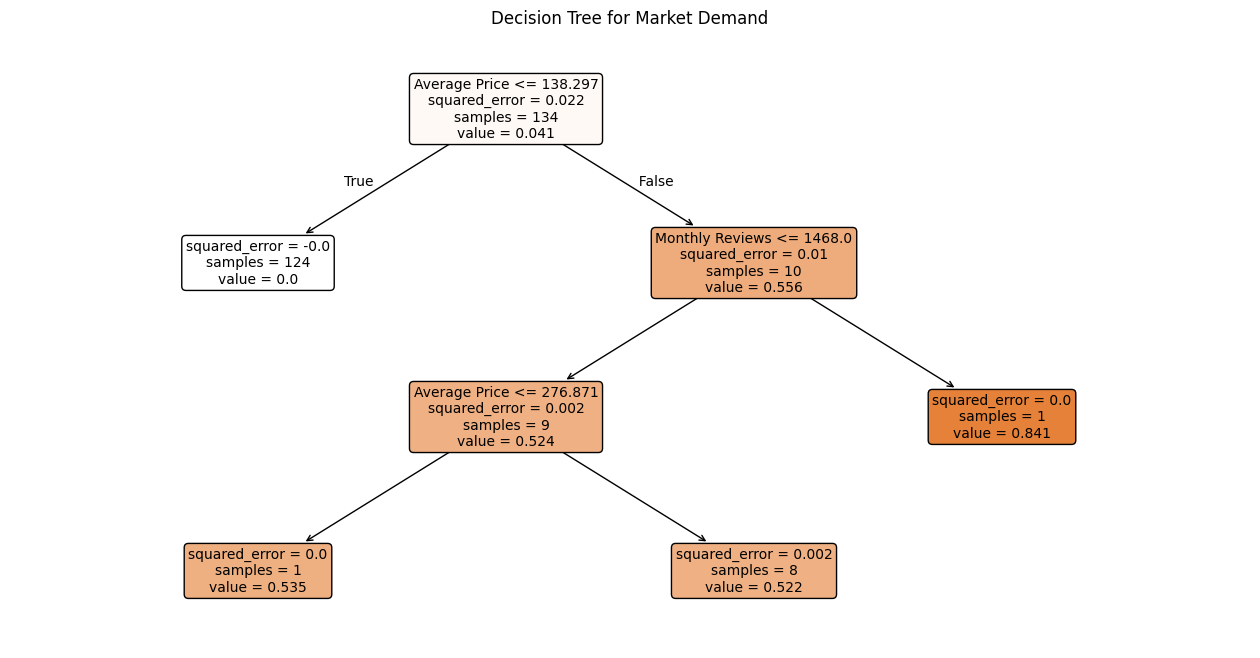

Feature Importances:
Average Price              0.969266
Monthly Reviews            0.030734
Monthly Active Listings    0.000000
dtype: float64


In [11]:
# Decision Tree for Market Supply/Demand
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
calendar = pd.read_csv('calendar.csv')
reviews = pd.read_csv('reviews.csv')
listings = pd.read_csv('listings.csv')


# Convert
calendar['date'] = pd.to_datetime(calendar['date'])
calendar['month'] = calendar['date'].dt.to_period('M')

reviews['date'] = pd.to_datetime(reviews['date'])
reviews['month'] = reviews['date'].dt.to_period('M')

# Monthly active listings
monthly_active_listings = calendar.groupby('month')['listing_id'].nunique()

# Monthly average price
calendar['price'] = calendar['price'].replace('[\$,]', '', regex=True).astype(float)
monthly_avg_price = calendar.groupby('month')['price'].mean()

# Monthly review counts
monthly_reviews = reviews.groupby('month')['listing_id'].count()

# Monthly occupancy rate
calendar['occupied_flag'] = calendar['available'].apply(lambda x: 1 if x == 'f' else 0)
monthly_occupancy = calendar.groupby('month')['occupied_flag'].mean()

# Combine features
data = pd.DataFrame({
    'Monthly Active Listings': monthly_active_listings,
    'Average Price': monthly_avg_price,
    'Monthly Reviews': monthly_reviews,
    'Monthly Occupancy Rate': monthly_occupancy
}).fillna(0)  # Replace missing values with 0

# Debugging
print(data)
print(data.info())


X = data[['Monthly Active Listings', 'Average Price', 'Monthly Reviews']]  # Independent variables
y = data['Monthly Occupancy Rate']  # Dependent variable


if len(data) < 2:
    raise ValueError("Insufficient data for training and testing. Ensure the data contains multiple months.")

# Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build
model = DecisionTreeRegressor(max_depth=5, random_state=42)  # Limit tree depth for simplicity
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-Squared Score:", r2)

# Visualization
plt.figure(figsize=(16, 8))
plot_tree(model, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree for Market Demand")
plt.show()

# Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
print("Feature Importances:")
print(feature_importances.sort_values(ascending=False))
